In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Podzielmy zbiór na cechy oraz etykiety - to już znamy
# Dla uproszczenia wybieramy tylko cechę trzecią i czwartą, tj długość i szerokość płatków
X = iris.data[:, [2, 3]]
y = iris.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator z trzema klastrami (klasami)
# Jak dotąd jest podobnie do Laboratorium 2
kmn = KMeans(n_clusters=3)

# Uczymy klasyfikator na danych treningowych
# Pierwsza różnica - uczenie przebiega bez nadzoru
# To znaczy nie pokazujemy klasyfikatorowi prawidłowych klas - gatunków kwiatów
# Zgodnie z konfiguracją wcześniej - powiedzieliśmy tylko że chcemy w zbiorze znaleźć 3 klasy
# Dokładny opis algorytmu: https://scikit-learn.org/stable/modules/clustering.html#k-means
kmn.fit(X_train)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Wyciągamy punkty centralne klastrów - pokażemy je na wykresie obok punktów ze zbioru uczącego
centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
# pierwszy wykres to nasz zbiór uczący, z prawdziwymi klasami
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)

# Teraz używamy danych treningowych żeby sprawdzić co klasyfikator o nich myśli
y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=20)

# Dokładamy na drugim wykresie centra klastrów
ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

# Różnice kolorów pomiędzy wykresami są nieistotne

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Próbujemy przewidzieć gatunki dla zbioru testowego
y_pred = kmn.predict(X_test)

# Nowe gatunki przewidziane przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)

# Tak jak powyżej, wyświetlamy centra klastrów
plt.scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])
['MPG', 'cylinders', 'cubicInches', 'horsepower', 'weightLbs', 'time-to-sixty', 'year']
{'cylinders': ['3', '4', '5', '6', '8']}
[1.400e+01 4.000e+00 3.500e+02 1.650e+02 4.209e+03 1.200e+01 1.972e+03]


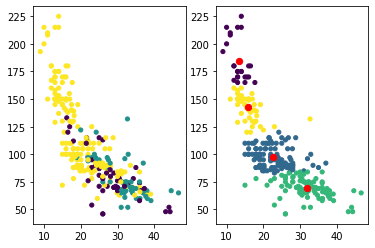

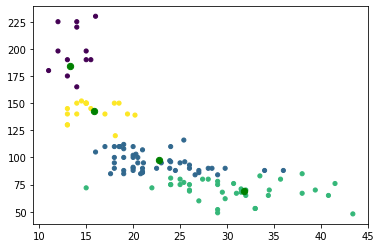

In [1]:
# Zadanie 1
# Poniżej przy pomocy funkcji fetch_openml można zaimportować zbiór danych o samochodach
# Zapoznaj się ze zbiorem danych (zwizualizuj wybrane przez siebie cechy) a następnie podziel go na zbiór uczący i testowy
# Wytrenuj klasyfikator KMeans z zadaną przez siebie liczbą klas i zwizualizuj wyniki predykcji na zbiorze testowym

# Zadanie 2
# Opisz własnymi słowami, jakie klasy samochodów wg Ciebie znalazły się w zbiorze


from sklearn.datasets import fetch_openml

samochody = fetch_openml('cars1')

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


print(samochody.keys())
print(samochody['feature_names'])
print(samochody['categories'])
print(samochody['data'][0])

# wybrałe cechę MPG (spaanie galony / mila - ) oraz moc silnika - 3
X = samochody.data[:, [0, 3]]
# nie ma to jak ściąga ;)
y = samochody['target']
y = [int(elem) for elem in y]

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator z czterema klastrami (klasami)
kmn = KMeans(n_clusters=4)

# Uczymy klasyfikator na danych treningowych
kmn.fit(X_train)

# punkty centralne klastrów
centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
# zbiór uczący, z prawdziwymi klasami
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=17)

# dane treningowe żeby sprawdzić co klasyfikator o nich myśli
y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=17)

# centra kalstrów na drugi wykres w
ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=40)
plt.show()

# klasy samochodów dla zbioru testowego - próba
y_pred = kmn.predict(X_test)

# Nowe klasy samochodów przewidziane przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=17)

# Tak jak powyżej, wyświetlamy centra klastrów
plt.scatter(centra[:, 0], centra[:, 1], c='green', s=40)
plt.show()

# Zadanie 2
# Opisz własnymi słowami, jakie klasy samochodów wg Ciebie znalazły się w zbiorze

# w zaleźności od spalania i mocy silnika, samochody są w różnych klastrach. u dołu są auta o najwyższym spalaniu i niskiej mocy,
# czym wyżej tym spalanie maleje i moc wzrasta


In [ ]:
samochody.keys()

In [ ]:
# Ściąga: Konwersja typów dla y

y = samochody['target']
y = [int(elem) for elem in y]
y[:5]